Anomalies for P, ET, R, GW, and TWSA once data has been put in csv (from anomalies_files.ipynb code)

    Input data, individual time series (m), seasonal time series, spatial plots, and block anomaly code 

In [1]:
import numpy as np
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader

import xarray as xr 
import salem
import rioxarray
import datetime as dt

import geopandas as gpd
from shapely.geometry import box, mapping
import geojson
from rasterio import features
from affine import Affine
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as colors

import skimage
import cartopy
import seaborn as sns

import statsmodels as sm
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.api as smapi
import seaborn as sns
import cftime
import netCDF4

Open and group variables

In [3]:
# opening and defining varaibles #

p_anom=pd.read_csv('D:/2021/la_plata/updated_data/anomaly_csv/p_anomaly.csv')
et_anom= pd.read_csv("D:/2021/la_plata/updated_data/anomaly_csv/et_anomaly.csv")
r_anom=pd.read_csv("D:/2021/la_plata/updated_data/anomaly_csv/r_anomaly.csv")
gw_anom=pd.read_csv('D:/2021/la_plata/updated_data/anomaly_csv/gw_anomaly.csv')
rzsm_anom=pd.read_csv('D:/2021/la_plata/updated_data/anomaly_csv/rz_anomaly.csv')
ssm_anom=pd.read_csv('D:/2021/la_plata/updated_data/anomaly_csv/ssm_anomaly.csv')
psm_anom=pd.read_csv('D:/2021/la_plata/updated_data/anomaly_csv/psm_anomaly.csv')
#twsa_open=pd.read_csv('D:/2021/la_plata/updated_data/anomaly_csv/grace_anomaly.csv')

In [4]:
#getting values for the anomalies
p_anomal = p_anom.groupby('time').agg({'P(mm)': ['mean']})
et_anomal = et_anom.groupby('time').agg({'ET(mm)': ['mean']})
r_anomal = r_anom.groupby('time').agg({'R(mm)': ['mean']})
gw_anomal = gw_anom.groupby('time').agg({'GW(mm)': ['mean']})
rzsm_anomaly = rzsm_anom.groupby('time').agg({'RZ(mm)': ['mean']})
ssm_anomaly = ssm_anom.groupby('time').agg({'SSM(mm)': ['mean']})
psm_anomaly = psm_anom.groupby('time').agg({'RZ(mm)': ['mean']})
#twsa = twsa_open.groupby('time').agg({'TWSA(mm)': ['mean']})

In [5]:
#conversion factors
p_anomaly= p_anomal*86400*30
et_anomaly= et_anomal*86400*30
r_anomaly= r_anomal*86400*30
gw_anomaly= gw_anomal


In [13]:
p_anom

,time,lat,lon,P(mm)
0,2003-01-01,-35.875,-67.875,NaN
1,2003-01-01,-35.875,-67.625,NaN
2,2003-01-01,-35.875,-67.375,NaN
3,2003-01-01,-35.875,-67.125,NaN
4,2003-01-01,-35.875,-66.875,NaN
...,...,...,...,...
2006395,2021-12-01,-14.125,-44.125,0.000089
2006396,2021-12-01,-14.125,-43.875,0.000085
2006397,2021-12-01,-14.125,-43.625,0.000086
2006398,2021-12-01,-14.125,-43.375,0.000086


Individual Time series of each anomaly (P, ET, R, GW, TWSA)

In [7]:
# Monthly P: Anomalies time series

def plot_ts(input_dataset, input_dataarray_name, variable_short_name, variable_long_name):
    fig, ax = plt.subplots(figsize=(14,4))

    plt.style.use('tableau-colorblind10')
    plt.rcParams.update({'font.size': 14})
    ax.tick_params(bottom = True, top = False, left = True, right = False)

    input_dataset[input_dataarray_name].mean(['lat','lon']).sel(time=(input_dataset[input_dataarray_name].time.dt.year.values > 2014)).plot(marker = 'o', color = '#ec6235', linewidth=1, ax = ax, markeredgewidth = 0.0)
    ax.set_ylabel(variable_short_name + ' Anomaly (mm)')
    ax.set_xlabel(None)
    ax.set_title('La Plata River Basin Average Monthly ' + variable_long_name + ' Anomalies (GLDAS)')
    plt.axhline(y=0, color = '#969696', linestyle='--', linewidth=1)

    fig.tight_layout()

plt('panom', 'P(mm)', 'P', 'Precipitation')


TypeError: 'module' object is not callable

TypeError: unhashable type: 'list'

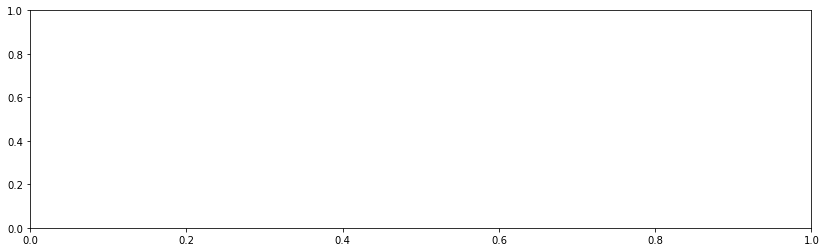

In [15]:
# Monthly ET: Anomalies time series

def plot_ts(input_dataset, input_dataarray_name, variable_short_name, variable_long_name):
    fig, ax = plt.subplots(figsize=(14,4))

    plt.style.use('tableau-colorblind10')
    plt.rcParams.update({'font.size': 14})
    ax.tick_params(bottom = True, top = False, left = True, right = False)

    input_dataset[input_dataarray_name].mean(['lat','lon']).sel(time=(input_dataset[input_dataarray_name].time.dt.year.values > 2014)).plot(marker = 'o', color = '#ec6235', linewidth=1, ax = ax, markeredgewidth = 0.0)
    ax.set_ylabel(variable_short_name + ' Anomaly (mm)')
    ax.set_xlabel(None)
    ax.set_title('La Plata River Basin Average Monthly ' + variable_long_name + ' Anomalies (GLDAS)')
    plt.axhline(y=0, color = '#969696', linestyle='--', linewidth=1)

    fig.tight_layout()

plot_ts(et_anomaly,'ET(mm)', 'E', 'Evapotranspiration')

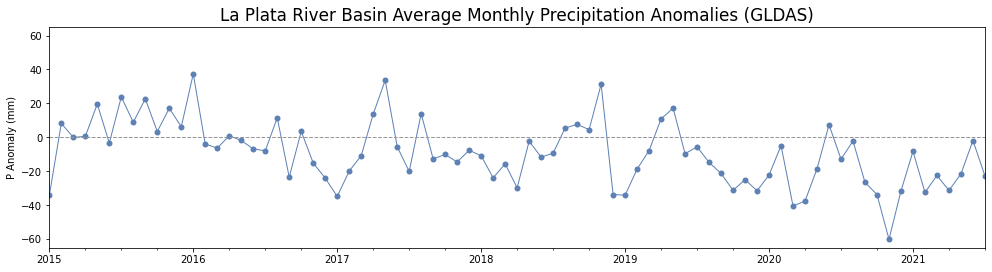

In [5]:
# Monthly P: Anomalies time series

p_anomaly.index = pd.to_datetime(p_anomaly.index,format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(14,4))

plt.style.use('tableau-colorblind10')
plt.rcParams.update({'font.size': 14})
ax.tick_params(bottom = True, top = False, left = True, right = False)

p_anomaly.plot(marker = 'o', color = '#5e81b5', legend = False, title = 'La Plata River Basin Average Monthly Precipitation Anomalies (GLDAS)', linewidth=1, ax = ax, markeredgewidth = 0.0)
ax.set_ylabel('P Anomaly (mm)')
ax.set_xlabel(None)
plt.axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
plt.xlim(['2015-01-01', '2021-07-01'])
plt.ylim([-65, 65])
fig.tight_layout()

plt.savefig('D:/2021/la_plata/figures/anomalies/p_anom.svg')
plt.savefig('D:/2021/la_plata/figures/anomalies/p_anom.png')



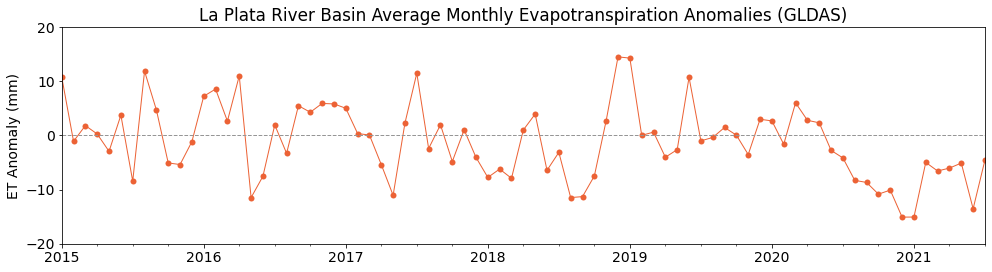

In [6]:
# Monthly ET: Anomalies time series

et_anomaly.index = pd.to_datetime(et_anomaly.index,format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(14,4))

plt.style.use('tableau-colorblind10')
plt.rcParams.update({'font.size': 14})
ax.tick_params(bottom = True, top = False, left = True, right = False)

et_anomaly.plot(marker = 'o', color = '#ec6235', legend = False, title = 'La Plata River Basin Average Monthly Evapotranspiration Anomalies (GLDAS)', linewidth=1, ax = ax, markeredgewidth = 0.0)
ax.set_ylabel('ET Anomaly (mm)')
ax.set_xlabel(None)
plt.axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
plt.xlim(['2015-01-01', '2021-07-01'])
plt.ylim([-20, 20])
fig.tight_layout()

plt.savefig('D:/2021/la_plata/figures/anomalies/et_anom.svg')
plt.savefig('D:/2021/la_plata/figures/anomalies/et_anom.png')

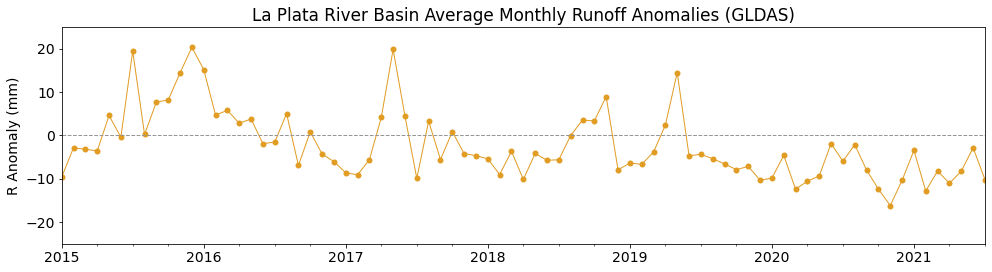

In [7]:
# Monthly R: Anomalies time series

r_anomaly.index = pd.to_datetime(r_anomaly.index,format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(14,4))

plt.style.use('tableau-colorblind10')
plt.rcParams.update({'font.size': 14})
ax.tick_params(bottom = True, top = False, left = True, right = False)

r_anomaly.plot(marker = 'o', color = '#e19c24', legend = False, title = 'La Plata River Basin Average Monthly Runoff Anomalies (GLDAS)', linewidth=1, ax = ax, markeredgewidth = 0.0)
ax.set_ylabel('R Anomaly (mm)')
ax.set_xlabel(None)
plt.axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
plt.xlim(['2015-01-01', '2021-07-01'])
plt.ylim([-25,25])
fig.tight_layout()

plt.savefig('D:/2021/la_plata/figures/anomalies/r_anom.svg')
plt.savefig('D:/2021/la_plata/figures/anomalies/r_anom.png')

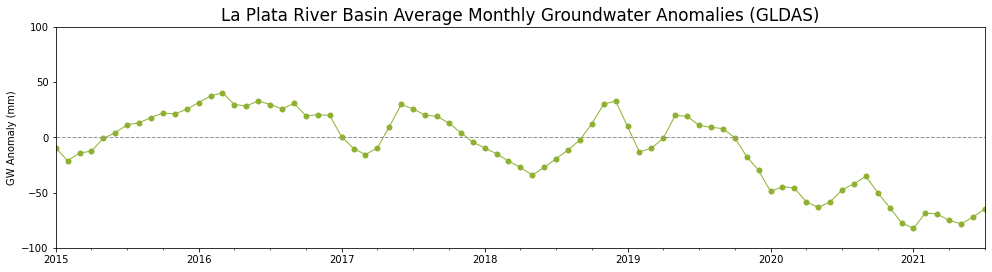

In [154]:
# Monthly GW: Anomalies time series

gw_anomaly.index = pd.to_datetime(gw_anomaly.index,format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(14,4))

plt.style.use('tableau-colorblind10')
plt.rcParams.update({'font.size': 14})
ax.tick_params(bottom = True, top = False, left = True, right = False)

gw_anomaly.plot(marker = 'o', color = '#8fb131', legend = False, title = 'La Plata River Basin Average Monthly Groundwater Anomalies (GLDAS)', linewidth=1, ax = ax, markeredgewidth = 0.0)
ax.set_ylabel('GW Anomaly (mm)')
ax.set_xlabel(None)
plt.axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
plt.xlim(['2015-01-01', '2021-07-01'])
plt.ylim([-100, 100])
fig.tight_layout()

plt.savefig('D:/2021/la_plata/figures/anomalies/gw_anom.svg')
plt.savefig('D:/2021/la_plata/figures/anomalies/gw_anom.png')


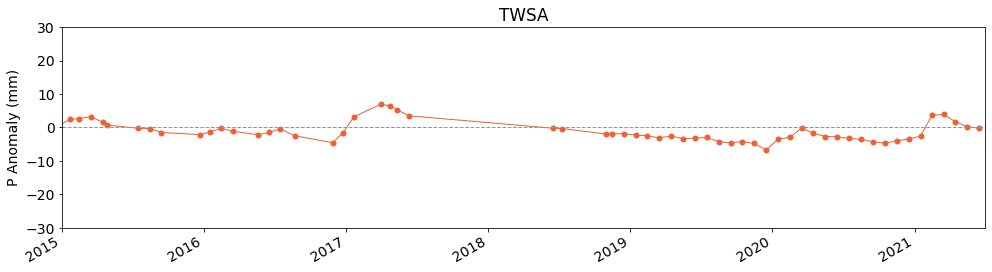

In [9]:
# Monthly TWSA: Anomalies time series

twsa.index = pd.to_datetime(twsa.index,format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(14,4))

plt.style.use('tableau-colorblind10')
plt.rcParams.update({'font.size': 14})
ax.tick_params(bottom = True, top = False, left = True, right = False)

twsa.plot(marker = 'o', color = '#ec6235', legend = False, title = 'TWSA', linewidth=1, ax = ax, markeredgewidth = 0.0)
ax.set_ylabel('P Anomaly (mm)')
ax.set_xlabel(None)
plt.axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
plt.xlim(['2015-01-01', '2021-07-01'])
plt.ylim([-30, 30])
fig.tight_layout()

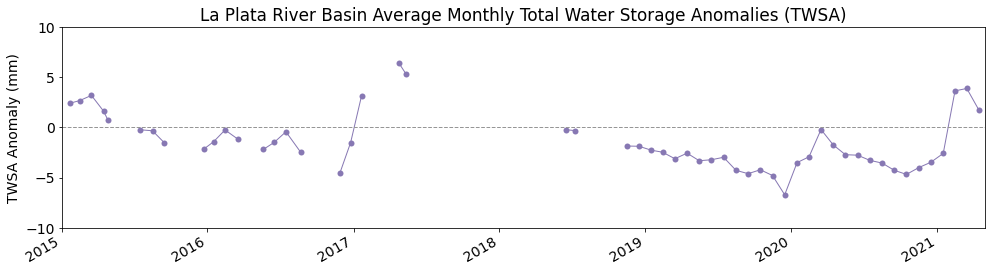

In [10]:
# TWSA: Anomalies time series (modeified for la plata basin with outage dates)

twsa_ts = pd.read_csv('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/data_for_anomalies/grace_anomaly.csv')

twsa_mean = twsa_ts.groupby('time').agg({'TWSA(mm)': ['mean']})

twsa_mean.index = pd.to_datetime(twsa_mean.index,format='%Y-%m-%d')

fig, ax = plt.subplots(figsize=(14,4))

plt.style.use('tableau-colorblind10')
plt.rcParams.update({'font.size': 14})
ax.tick_params(bottom = True, top = False, left = True, right = False)

twsa_mean['2015-01-01':'2015-06-01'].plot(marker = 'o', color = '#8778b3', legend = False, title = 'La Plata River Basin Average Monthly Total Water Storage Anomalies (TWSA)', linewidth=1, ax = ax, markeredgewidth = 0.0)
twsa_mean['2015-07-01':'2015-10-01'].plot(marker = 'o', color = '#8778b3', legend = False, title = 'La Plata River Basin Average Monthly Total Water Storage Anomalies (TWSA)', linewidth=1, ax = ax, markeredgewidth = 0.0)
twsa_mean['2015-12-01':'2016-04-01'].plot(marker = 'o', color = '#8778b3', legend = False, title = 'La Plata River Basin Average Monthly Total Water Storage Anomalies (TWSA)', linewidth=1, ax = ax, markeredgewidth = 0.0)
twsa_mean['2016-05-01':'2016-09-01'].plot(marker = 'o', color = '#8778b3', legend = False, title = 'La Plata River Basin Average Monthly Total Water Storage Anomalies (TWSA)', linewidth=1, ax = ax, markeredgewidth = 0.0)
twsa_mean['2016-11-01':'2017-02-01'].plot(marker = 'o', color = '#8778b3', legend = False, title = 'La Plata River Basin Average Monthly Total Water Storage Anomalies (TWSA)', linewidth=1, ax = ax, markeredgewidth = 0.0)
twsa_mean['2017-04-01':'2017-06-01'].plot(marker = 'o', color = '#8778b3', legend = False, title = 'La Plata River Basin Average Monthly Total Water Storage Anomalies (TWSA)', linewidth=1, ax = ax, markeredgewidth = 0.0)
twsa_mean['2018-06-01':'2018-08-01'].plot(marker = 'o', color = '#8778b3', legend = False, title = 'La Plata River Basin Average Monthly Total Water Storage Anomalies (TWSA)', linewidth=1, ax = ax, markeredgewidth = 0.0)
twsa_mean['2018-11-01':'2021-05-01'].plot(marker = 'o', color = '#8778b3', legend = False, title = 'La Plata River Basin Average Monthly Total Water Storage Anomalies (TWSA)', linewidth=1, ax = ax, markeredgewidth = 0.0)


ax.set_ylabel('TWSA Anomaly (mm)')
ax.set_xlabel(None)
plt.axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
plt.xlim(['2015-01-01', '2021-05-01'])
plt.ylim([-10, 10])
fig.tight_layout()

plt.savefig('D:/2021/la_plata/figures/anomalies/twsa_anom.svg')
plt.savefig('D:/2021/la_plata/figures/anomalies/twsa_anom.png')

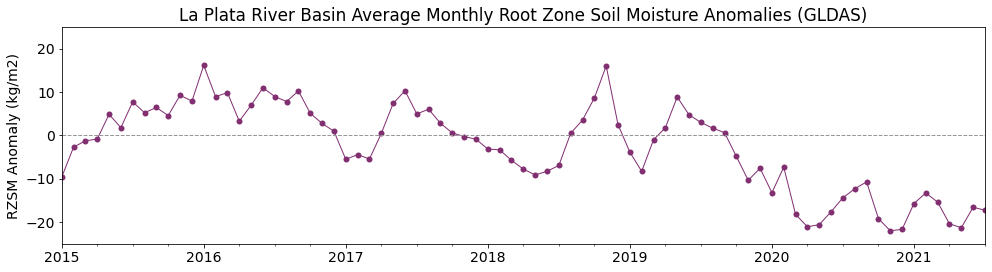

In [11]:
# Monthly RZSM: Anomalies time series

rzsm_anomaly.index = pd.to_datetime(rzsm_anomaly.index,format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(14,4))

plt.style.use('tableau-colorblind10')
plt.rcParams.update({'font.size': 14})
ax.tick_params(bottom = True, top = False, left = True, right = False)

rzsm_anomaly.plot(marker = 'o', color = '#822f72', legend = False, title = 'La Plata River Basin Average Monthly Root Zone Soil Moisture Anomalies (GLDAS)', linewidth=1, ax = ax, markeredgewidth = 0.0)
ax.set_ylabel('RZSM Anomaly (kg/m2)')
ax.set_xlabel(None)
plt.axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
plt.xlim(['2015-01-01', '2021-07-01'])
plt.ylim([-25, 25])
fig.tight_layout()

plt.savefig('D:/2021/la_plata/figures/anomalies/rzsm_anom.svg')
plt.savefig('D:/2021/la_plata/figures/anomalies/rzsm_anom.png')



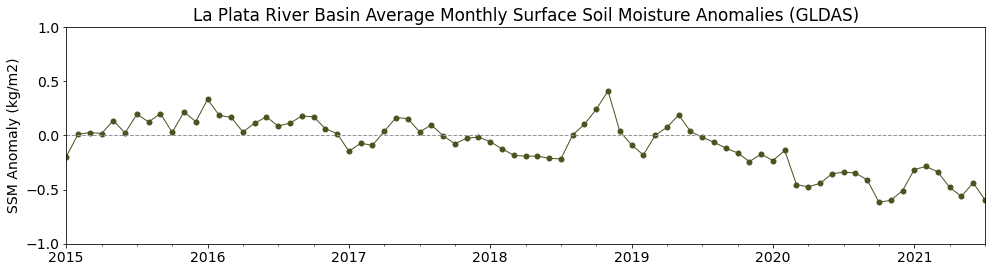

In [25]:
# Monthly SSM: Anomalies time series

ssm_anomaly.index = pd.to_datetime(ssm_anomaly.index,format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(14,4))

plt.style.use('tableau-colorblind10')
plt.rcParams.update({'font.size': 14})
ax.tick_params(bottom = True, top = False, left = True, right = False)

ssm_anomaly.plot(marker = 'o', color = '#4b5320', legend = False, title = 'La Plata River Basin Average Monthly Surface Soil Moisture Anomalies (GLDAS)', linewidth=1, ax = ax, markeredgewidth = 0.0)
ax.set_ylabel('SSM Anomaly (kg/m2)')
ax.set_xlabel(None)
plt.axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
plt.xlim(['2015-01-01', '2021-07-01'])
plt.ylim([-1, 1])
fig.tight_layout()

plt.savefig('D:/2021/la_plata/figures/anomalies/ssm_anom.svg')
plt.savefig('D:/2021/la_plata/figures/anomalies/ssm_anom.png')



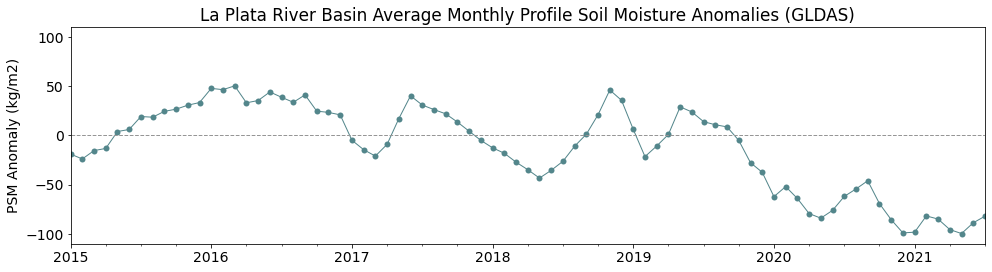

In [26]:
# Monthly SSM: Anomalies time series

psm_anomaly.index = pd.to_datetime(psm_anomaly.index,format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(14,4))

plt.style.use('tableau-colorblind10')
plt.rcParams.update({'font.size': 14})
ax.tick_params(bottom = True, top = False, left = True, right = False)

psm_anomaly.plot(marker = 'o', color = '#53868b', legend = False, title = 'La Plata River Basin Average Monthly Profile Soil Moisture Anomalies (GLDAS)', linewidth=1, ax = ax, markeredgewidth = 0.0)
ax.set_ylabel('PSM Anomaly (kg/m2)')
ax.set_xlabel(None)
plt.axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
plt.xlim(['2015-01-01', '2021-07-01'])
plt.ylim([-110, 110])
fig.tight_layout()

plt.savefig('D:/2021/la_plata/figures/anomalies/psm_anom.svg')
plt.savefig('D:/2021/la_plata/figures/anomalies/psm_anom.png')



Seasonal Anomalies

In [6]:
#get seasonal averages for anomalies
average_seasonal_et_anom = et_anomaly.resample(time='QS-DEC').mean()
average_seasonal_p_anom = p_anomaly.resample(time='QS-DEC').mean()
average_seasonal_r_anom = r_anomaly.resample(time='QS-DEC').mean()

In [ ]:
#seasonal averages to dataframes 
average_seasonal_et_anom_df = average_seasonal_et_anom.mean(['lat','lon']).to_dataframe('average_seasonal_et_anom')
average_seasonal_p_anom_df = average_seasonal_p_anom.mean(['lat','lon']).to_dataframe('average_seasonal_p_anom')
average_seasonal_r_anom_df = average_seasonal_r_anom.mean(['lat','lon']).to_dataframe('average_seasonal_r_anom')

In [ ]:
#all seasonal anomalies on one time series chart 
tick_range = range(-50,60,10)
title = ['La Plata River Basin Seasonal Anomalies']

plt.rc('font', size=8)

fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(6.5,3), dpi=100)

lns1 = axs.plot(average_seasonal_r_anom.time,average_seasonal_r_anom.mean(['lat','lon']),color='blue',linewidth=1)
axs.set_ylabel('(mm)')
axs.grid(which='major',axis='y')

#axs.legend(['Runoff Anomalies (mm)'])

ax2 = axs.twinx()
lns2 = ax2.plot(average_seasonal_et_anom_df['2015':'2021'],average_seasonal_et_anom.mean(['lat','lon']),color='red',linewidth=1)
ax2.set_ylim([-50,50])

ax3 = axs.twinx()
lns2 = ax3.plot(average_seasonal_p_anom_df['2015':'2021'],average_seasonal_p_anom.mean(['lat','lon']),color='green',linewidth=1)
ax3.set_ylim([-50,50])
#ax3.legend([' Precipitation Anomalies(mm)'],bbox_to_anchor = (0.7,0.8))

axs.set_title(title,fontsize=12)

axs.set_yticks(tick_range)
ax2.set_yticks(tick_range)

axs.xaxis.set_major_locator(mdates.YearLocator(2))
axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


axs.legend(['Runoff Anomaly'],loc='lower center',ncol=4,bbox_to_anchor=(0.85, -0.3), fontsize=8)
ax2.legend(['Evapotranspiration Anomaly'],loc='lower center',ncol=4,bbox_to_anchor=(0.5, -0.3), fontsize=8)
ax3.legend(['Precipitation Anomaly'],loc='lower center',ncol=4,bbox_to_anchor=(0.1, -0.3), fontsize=8)

fig.tight_layout()


In [ ]:
# Seasonal ET: Anomalies time series (can be done with P, R, GW, and TWSA as well)

average_seasonal_et_anom.index = pd.to_datetime(average_seasonal_et_anom.index,format='%Y-%m-%d')
fig, ax = plt.subplots(figsize=(14,4))

plt.style.use('classic')
plt.rcParams.update({'font.size': 14})
ax.tick_params(bottom = True, top = False, left = True, right = False)

average_seasonal_et_anom.plot(marker = 'o', color = '#ec6235', legend = False, title = 'La Plata River Basin Average Monthly Evapotranspiration Anomalies (GLDAS)', linewidth=1, ax = ax, markeredgewidth = 0.0)
ax.set_ylabel('ET Anomaly (mm)')
ax.set_xlabel(None)
plt.axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
plt.xlim(['2002-01-01', '2021-07-01'])
plt.ylim([-30, 30])
fig.tight_layout()


Individual Spatial Plots for Anomalies

In [11]:
p_anom

,time,lat,lon,P(mm)
0,2003-01-01,-35.875,-67.875,NaN
1,2003-01-01,-35.875,-67.625,NaN
2,2003-01-01,-35.875,-67.375,NaN
3,2003-01-01,-35.875,-67.125,NaN
4,2003-01-01,-35.875,-66.875,NaN
...,...,...,...,...
2006395,2021-12-01,-14.125,-44.125,NaN
2006396,2021-12-01,-14.125,-43.875,NaN
2006397,2021-12-01,-14.125,-43.625,NaN
2006398,2021-12-01,-14.125,-43.375,NaN


In [12]:
p_anom_x = p_anom.to_xarray()

In [15]:
p_anom_x

<xarray.Dataset>
Dimensions:  (index: 2006400)
Coordinates:
  * index    (index) int64 0 1 2 3 4 ... 2006395 2006396 2006397 2006398 2006399
Data variables:
    time     (index) object '2003-01-01' '2003-01-01' ... '2021-12-01'
    lat      (index) float64 -35.88 -35.88 -35.88 ... -14.12 -14.12 -14.12
    lon      (index) float64 -67.88 -67.62 -67.38 ... -43.62 -43.38 -43.12
    P(mm)    (index) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan

In [8]:
## define and get path for P
shapefile_path = r'C:/Users/Jessica Besnier\Documents/Fall 2021\AGU data/river_basin_shape-file'
p_csv=xr.open_dataset('D:/2021/la_plata/updated_data/GLDAS_anomaly/GLDAS_anomaly/panom_gldas22_laplata_200302-202112.nc', decode_times=False)

units, reference_date = p_csv.time.attrs['units'].split('since')
p_csv['time'] = pd.date_range(start=reference_date, periods=p_csv.sizes['time'], freq='MS')
p_csv_c= p_csv*86400*30

filename = ['la_plata']

def extract_values(i):
    shdf = salem.read_shapefile(shapefile_path + '/' + filename[i]+'.shp')

    p = p_csv_c.anom.salem.roi(shape=shdf)

    p_lat = p.dropna(dim='lat',how='all')
    p_lon = p_lat.dropna(dim='lon',how='all')

    return p_lon

la_plata_imerg = extract_values(0)

In [30]:
## define and get path for P Lower Parahuay
shapefile_path = r'C:/Users/Jessica Besnier/Documents/Spring 2022/Research/sub basin'
p_csv=xr.open_dataset('D:/2021/la_plata/updated_data/GLDAS_anomaly/GLDAS_anomaly/panom_gldas22_laplata_200302-202112.nc', decode_times=False)

units, reference_date = p_csv.time.attrs['units'].split('since')
p_csv['time'] = pd.date_range(start=reference_date, periods=p_csv.sizes['time'], freq='MS')
p_csv_c= p_csv*86400*30

filename = ['upper_parana_']

def extract_values(i):
    shdf = salem.read_shapefile(shapefile_path + '/' + filename[i]+'.shp')

    p = p_csv_c.anom.salem.roi(shape=shdf)

    p_lat = p.dropna(dim='lat',how='all')
    p_lon = p_lat.dropna(dim='lon',how='all')

    return p_lon

la_plata_imerg_upr = extract_values(0)

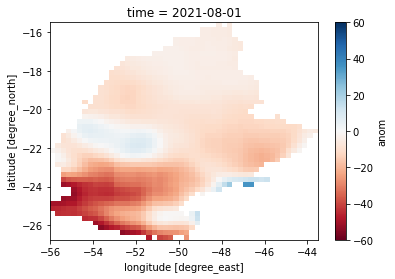

In [55]:
## Make spatial plot for P
date1 = '2021-08-01' #showing for the whole month in mm/month
la_plata_imerg_upr.sel(time=date1).plot.imshow(x='lon',y='lat',cmap='RdBu',robust=True, vmin= -60, vmax = 60)

plt.savefig('D:/2021/la_plata/figures/anomalies/PUPR'+date+'.png')


ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

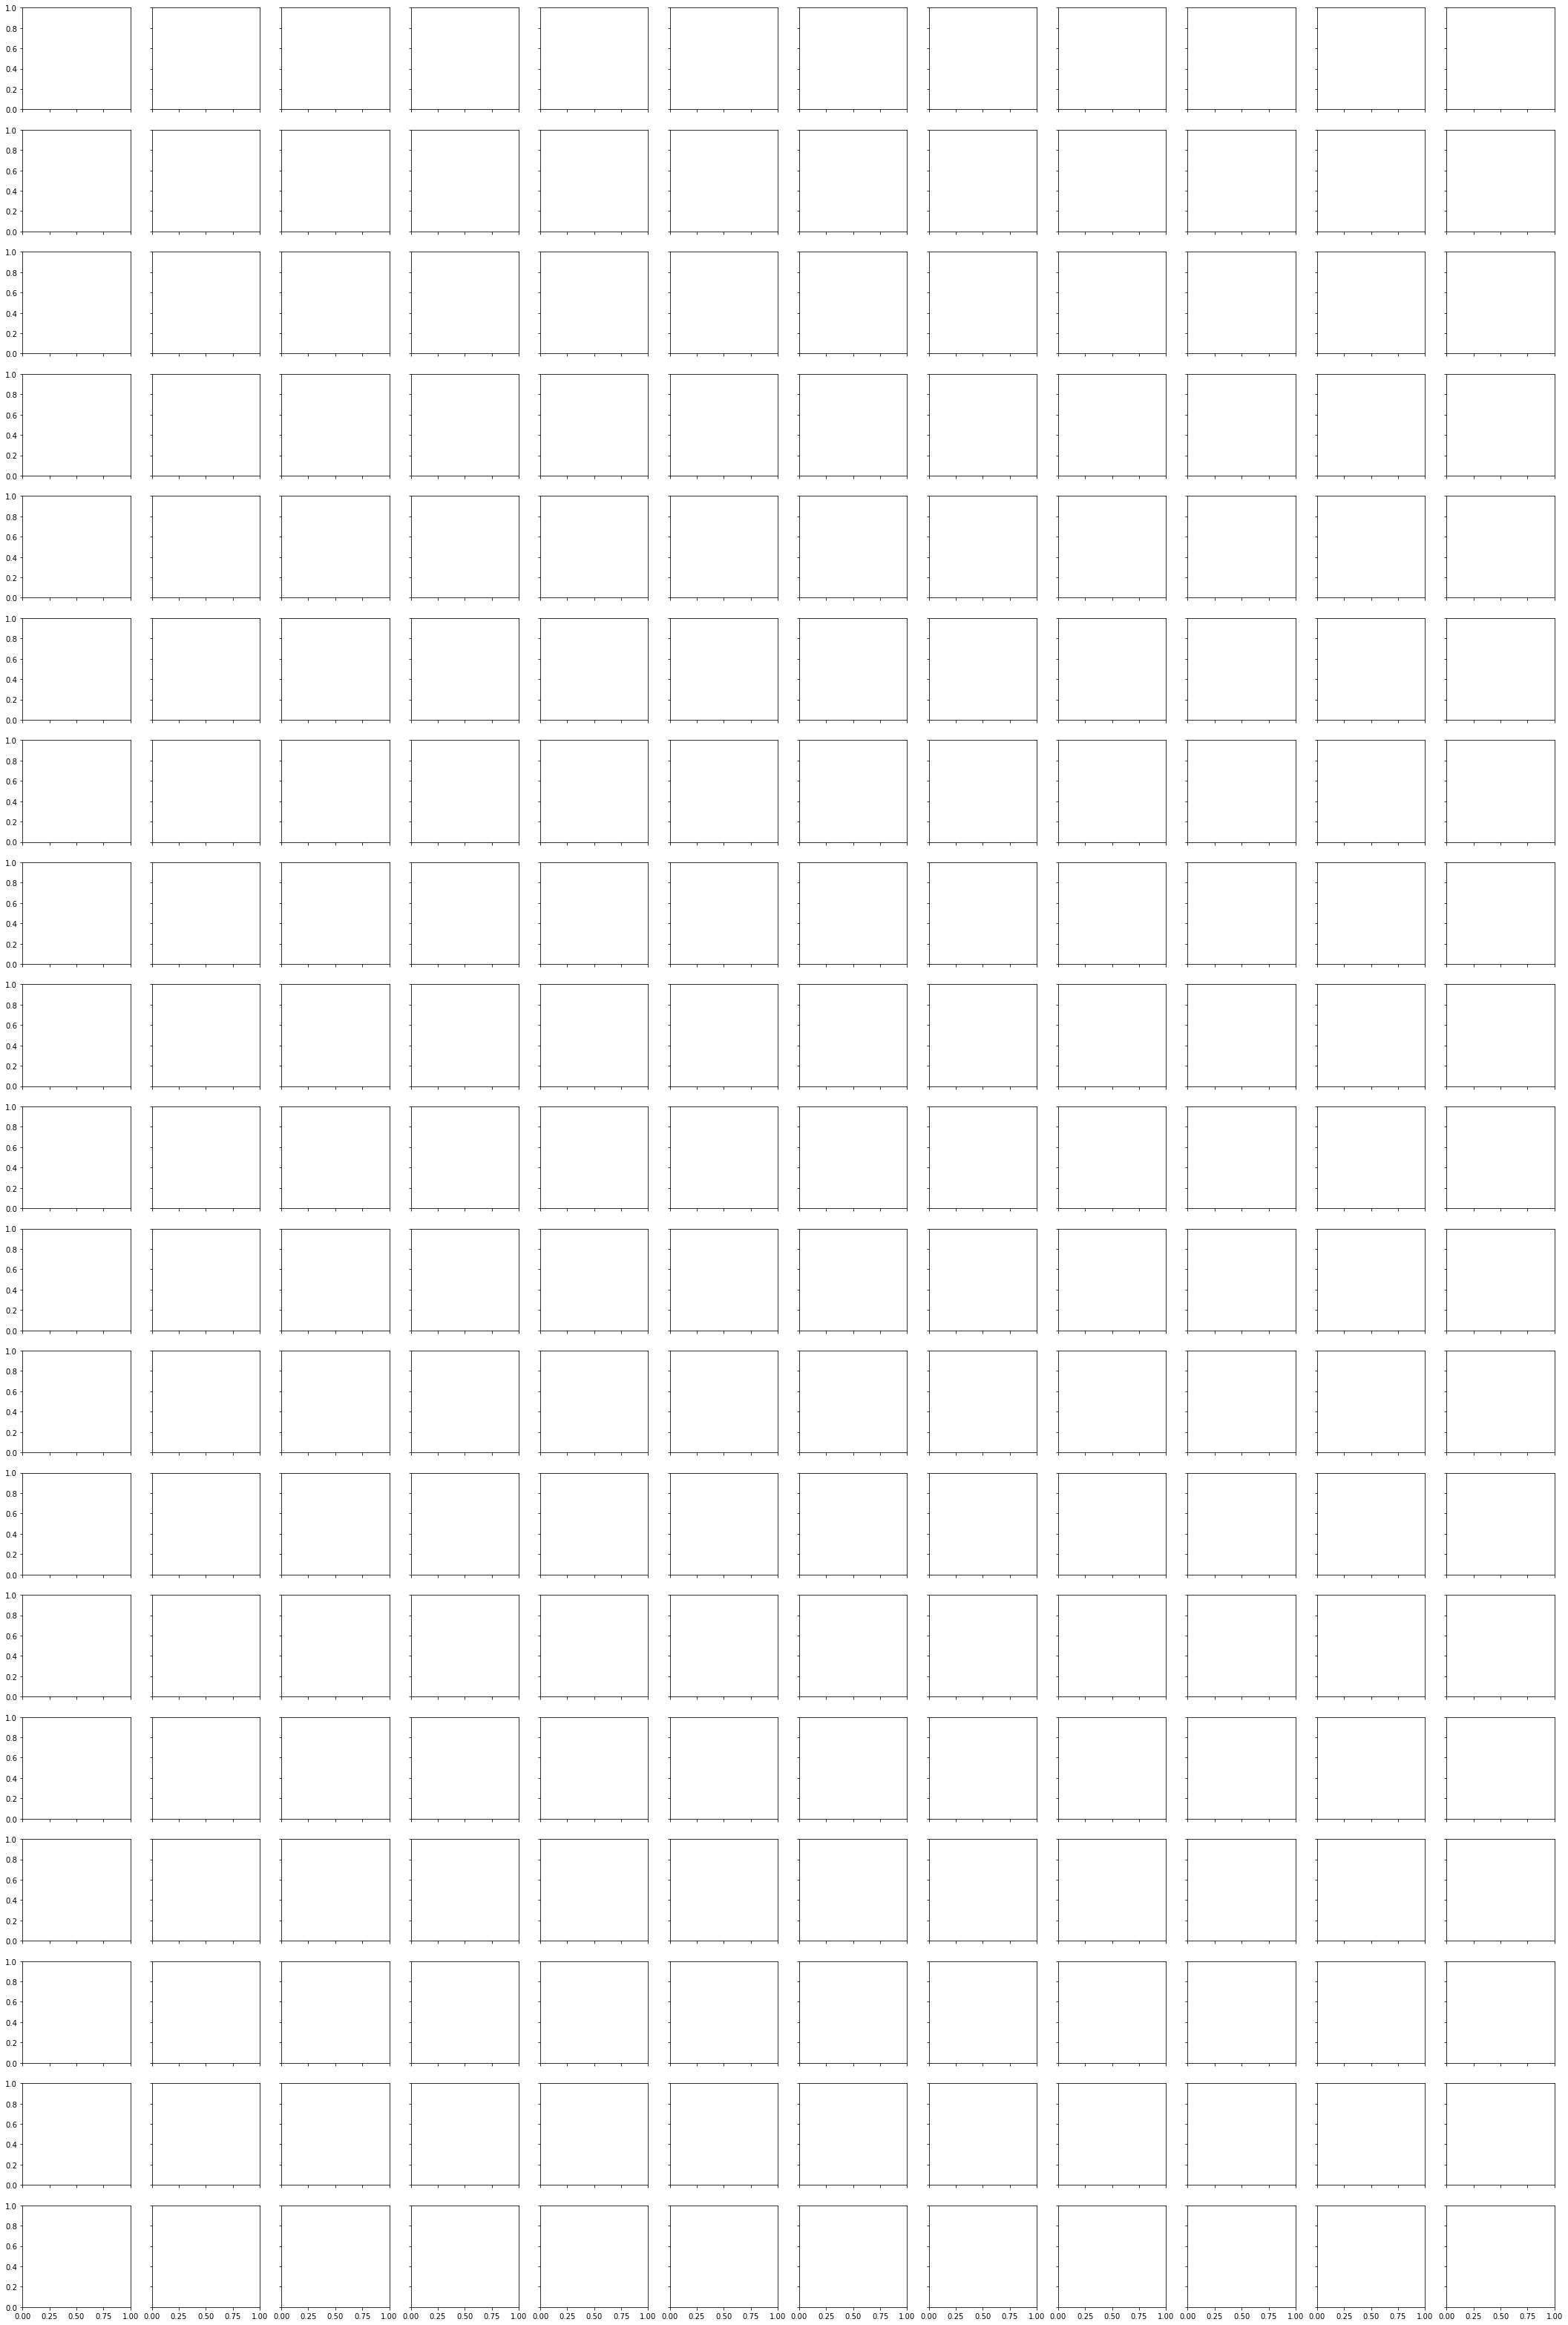

In [39]:
## ALL spatial plots for P
#date = '2020-06-01' #showing for the whole month in mm/month
#la_plata_imerg.sel(time=date).plot.imshow(x='lon',y='lat',cmap='RdBu',robust=True, vmin= -60, vmax = 60)


g_simple = la_plata_imerg_upr.plot(x="lon", y="lat", col="time", col_wrap=12, vmin = -30, vmax = 30)

plt.savefig('D:/2021/la_plata/figures/anomalies/P'+'upper_parana_P'+'.png')


In [43]:
#define and get path for ET
et_csv= xr.open_dataset('D:/2021/la_plata/gldas_da_anom/etanom_gldas22_laplata_200302-202110.nc', decode_times=False)
units, reference_date = et_csv.time.attrs['units'].split('since')
et_csv['time'] = pd.date_range(start=reference_date, periods=et_csv.sizes['time'], freq='MS')
et_csv_c= et_csv*86400*30

def extract_values(i):
    shdf = salem.read_shapefile(shapefile_path + '/' + filename[i]+'.shp')

    et = et_csv_c.anom.salem.roi(shape=shdf)

    et_lat = et.dropna(dim='lat',how='all')
    et_lon = et_lat.dropna(dim='lon',how='all')

    return et_lon

la_plata_et = extract_values(0)

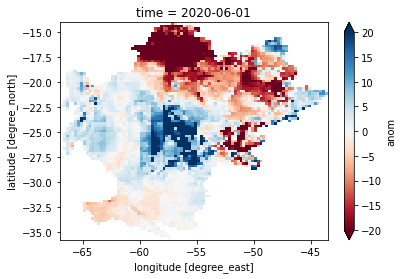

In [135]:
# ET GLDAS: Make spatial plot 
date = '2020-06-01' 

la_plata_et.sel(time = date).plot.imshow(x='lon', y='lat', cmap = 'RdBu', robust=True, vmin= -20, vmax = 20)
plt.savefig('D:/2021/la_plata/figures/anomalies/ET'+date+'.png')


In [88]:
#define and get path for R

r_csv= xr.open_dataset('D:/2021/la_plata/gldas_da_anom/ranom_gldas22_laplata_200302-202110.nc', decode_times=False)
units, reference_date = r_csv.time.attrs['units'].split('since')
r_csv['time'] = pd.date_range(start=reference_date, periods=r_csv.sizes['time'], freq='MS')
r_csv_c= r_csv*86400*30
def extract_values(i):

    shdf = salem.read_shapefile(shapefile_path + '/' + filename[i]+'.shp')

    r = r_csv.anom.salem.roi(shape=shdf)

    r_lat = r.dropna(dim='lat',how='all')
    r_lon = r_lat.dropna(dim='lon',how='all')

    return r_lon

la_plata_r = extract_values(0)

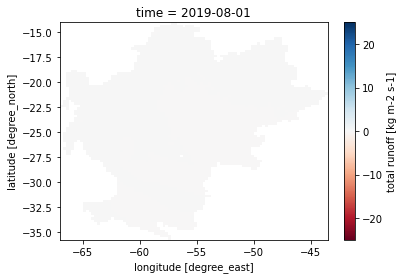

In [92]:
#R GLDAS: Spatial Plot
date = '2019-08-01' #showing for the whole month

la_plata_r.sel(time = date).plot.imshow(x='lon', y='lat', cmap = 'RdBu', robust=True, vmin= -25, vmax = 25)

In [7]:
gw_csv

<xarray.Dataset>
Dimensions:  (time: 228, lat: 88, lon: 100)
Coordinates:
  * lat      (lat) float32 -35.88 -35.62 -35.38 -35.12 ... -14.62 -14.38 -14.12
  * lon      (lon) float32 -67.88 -67.62 -67.38 -67.12 ... -43.62 -43.38 -43.12
  * time     (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2021-12-01
Data variables:
    anom     (time, lat, lon) float32 ...
Attributes:
    note:         climatology base period 2003-2020
    source_file:  ECMWF, CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_v02.nc
    title:        GRACEFO_DA_CLSMF2.5_GLDAS2.2 Monthly Precipitation Anomaly
    history:      Mon Dec  6 11:22:46 2021: ncks -v anom -d lon,-68.0,-43.0 -...
    NCO:          netCDF Operators version 5.0.1 (Homepage = http://nco.sf.ne...

In [5]:
#GW define
gw_csv= xr.open_dataset('D:/2021/la_plata/gldas_da_anom/gwsanom_gldas22_laplata_200302-202110.nc', decode_times=False)

units, reference_date = gw_csv.time.attrs['units'].split('since')
gw_csv['time'] = pd.date_range(start=reference_date, periods=gw_csv.sizes['time'], freq='MS')

def extract_values(i):
    shdf = salem.read_shapefile(shapefile_path + '/' + filename[i]+'.shp')

    gw = gw_csv.salem.roi(shape=shdf)

    gw_lat = gw.dropna(dim='lat',how='all')
    gw_lon = gw.dropna(dim='lon',how='all')

    return gw_lon

la_plata_gw = extract_values(0)

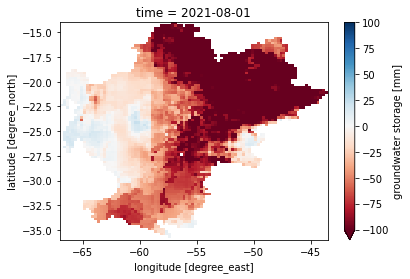

In [29]:
#GW GLDAS: Spatial Plot
date = '2021-08-01' #showing for the whole month

la_plata_gw.anom.sel(time = date).plot.imshow(x='lon', y='lat', cmap = 'RdBu', robust=True, vmin= -100, vmax = 100)
plt.savefig('D:/2021/la_plata/figures/anomalies/GW'+date+'.png')


In [40]:
#TWSA define

def extract_values(i):
    shdf = salem.read_shapefile(shapefile_path + '/' + filename[i]+'.shp')

    r = twsa_mean.salem.roi(shape=shdf)

    twsa_lat = r.dropna(dim='lat',how='all')
    twsa_lon = twsa_lat.dropna(dim='lon',how='all')

    return twsa_lon

la_plata_twsa = extract_values(0)

AttributeError: 'DataFrame' object has no attribute 'salem'

In [ ]:
# TWSA GLDAS: Make spatial plot 
date = '2020-11-01' #showing for the whole month

la_plata_r.sel(time = date).plot.imshow(x='lon', y='lat', cmap = 'RdBu', robust=True, vmin= -30, vmax = 30)

In [127]:
psm_csv

<xarray.Dataset>
Dimensions:  (time: 228, lat: 88, lon: 100)
Coordinates:
  * lat      (lat) float32 -35.88 -35.62 -35.38 -35.12 ... -14.62 -14.38 -14.12
  * lon      (lon) float32 -67.88 -67.62 -67.38 -67.12 ... -43.62 -43.38 -43.12
  * time     (time) float32 0.0 1.0 2.0 3.0 4.0 ... 224.0 225.0 226.0 227.0
Data variables:
    anom     (time, lat, lon) float32 ...
Attributes:
    note:         climatology base period 2003-2020
    source_file:  ECMWF, CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_v02.nc
    title:        GRACEFO_DA_CLSMF2.5_GLDAS2.2 Monthly Precipitation Anomaly
    history:      Mon Dec  6 11:23:54 2021: ncks -v anom -d lon,-68.0,-43.0 -...
    NCO:          netCDF Operators version 5.0.1 (Homepage = http://nco.sf.ne...

In [81]:
#SSM define
psm_csv= xr.open_dataset('D:/2021/la_plata/gldas_da_anom/prsmanom_gldas22_laplata_200302-202110.nc', decode_times=False)

units, reference_date = psm_csv.time.attrs['units'].split('since')
psm_csv['time'] = pd.date_range(start=reference_date, periods=psm_csv.sizes['time'], freq='MS')

def extract_values(i):
    shdf = salem.read_shapefile(shapefile_path + '/' + filename[i]+'.shp')

    psm = psm_csv.salem.roi(shape=shdf)
    psm_lat = psm.dropna(dim='lat',how='all')
    psm_lon = psm.dropna(dim='lon',how='all')

    return psm_lon

la_plata_psm = extract_values(0)

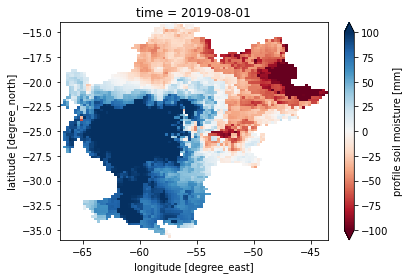

In [84]:
#PSM GLDAS: Spatial Plot
date = '2019-08-01' #showing for the whole month

la_plata_psm.anom.sel(time = date).plot.imshow(x='lon', y='lat', cmap = 'RdBu', robust=True, vmin= -100, vmax = 100)
plt.savefig('D:/2021/la_plata/figures/anomalies/PSM'+date+'.png')


In [51]:
#RZSM define
rzsm_csv= xr.open_dataset('D:/2021/la_plata/gldas_da_anom/rtzsmanom_gldas22_laplata_200302-202110.nc', decode_times=False)

units, reference_date = rzsm_csv.time.attrs['units'].split('since')
rzsm_csv['time'] = pd.date_range(start=reference_date, periods=rzsm_csv.sizes['time'], freq='MS')

def extract_values(i):
    shdf = salem.read_shapefile(shapefile_path + '/' + filename[i]+'.shp')

    rzsm = rzsm_csv.salem.roi(shape=shdf)
    rzsm_lat = rzsm.dropna(dim='lat',how='all')
    rzsm_lon = rzsm.dropna(dim='lon',how='all')

    return rzsm_lon

la_plata_rzsm = extract_values(0)

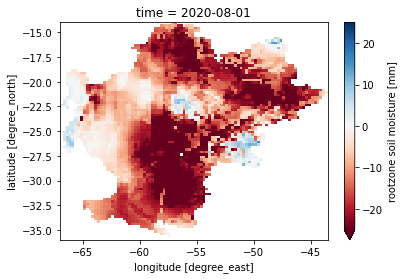

In [77]:
#RZSM GLDAS: Spatial Plot
date = '2020-08-01' #showing for the whole month

la_plata_rzsm.anom.sel(time = date).plot.imshow(x='lon', y='lat', cmap = 'RdBu', robust=True, vmin= -25, vmax = 25)
plt.savefig('D:/2021/la_plata/figures/anomalies/RZSM'+date+'.png')


Block Anomaly Code

C:\Users\JESSIC~1\AppData\Local\Temp/ipykernel_56324/3600607908.py:52: UserWarning: Attempting to set identical bottom == top == -50 results in singular transformations; automatically expanding.
  axes[0].set_ylim([-50,-50])


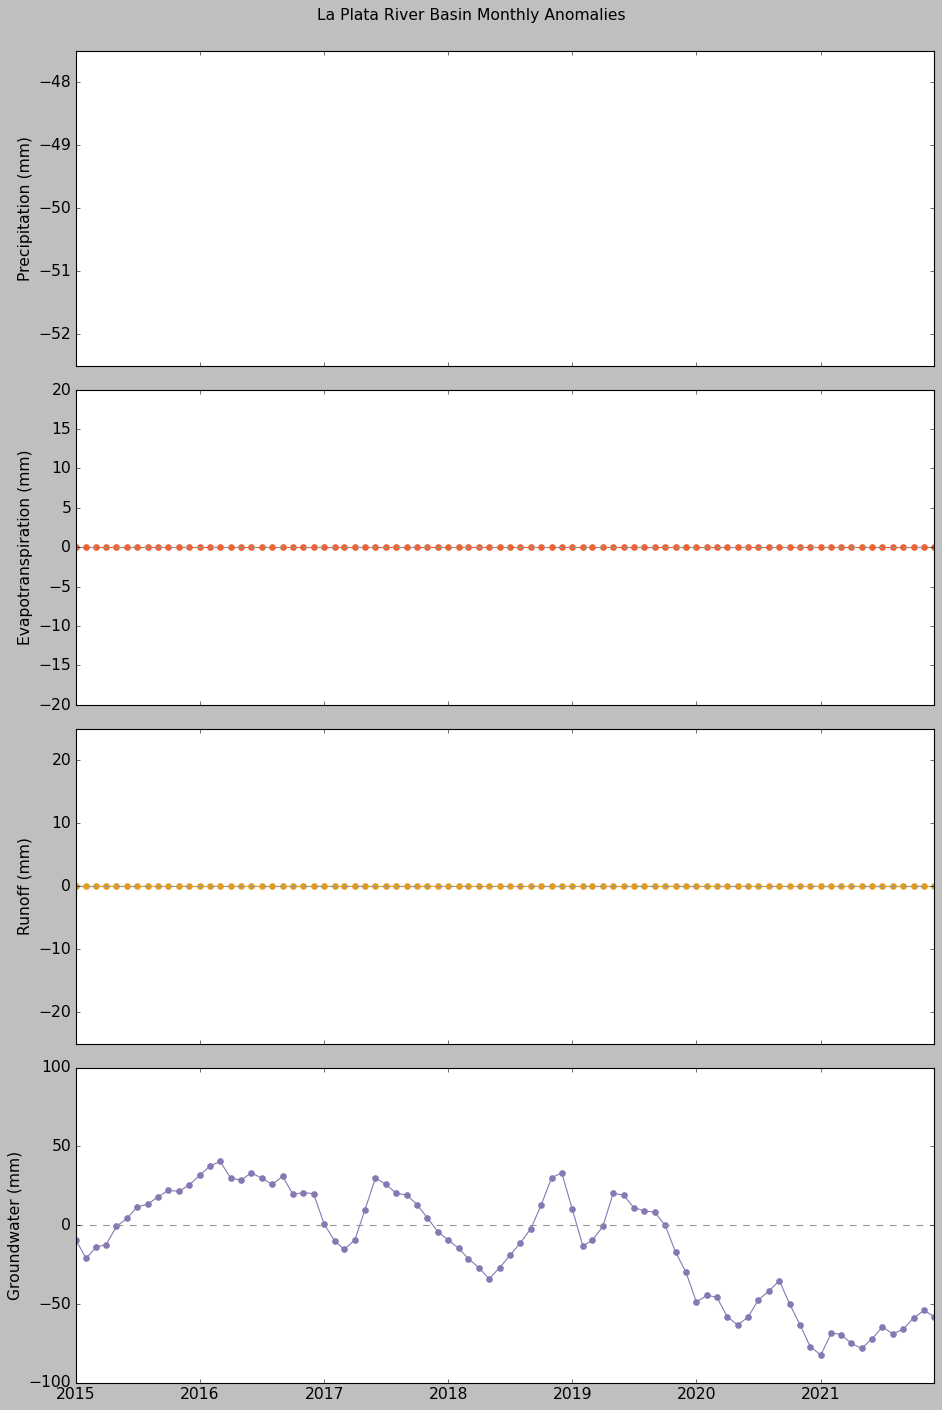

In [21]:
#all for lprb updated for all 2021
# wrote on 3/6

def plot_yearly_anomaly(basin):

    p = pd.read_csv('D:/2021/la_plata/updated_data/anomaly_csv/p_anomaly.csv')
    et = pd.read_csv('D:/2021/la_plata/updated_data/anomaly_csv/et_anomaly.csv')
    r = pd.read_csv('D:/2021/la_plata/updated_data/anomaly_csv/r_anomaly.csv')
    gw = pd.read_csv('D:/2021/la_plata/updated_data/anomaly_csv/gw_anomaly.csv')

    #need conversion factors

    p_mean = p.groupby('time').agg({'P(mm)': ['mean']})
    et_mean = et.groupby('time').agg({'ET(mm)': ['mean']})
    r_mean = r.groupby('time').agg({'R(mm)': ['mean']})
    gw_mean = gw.groupby('time').agg({'GW(mm)': ['mean']})

    p_mean.index = pd.to_datetime(p_mean.index,format='%Y-%m-%d')
    et_mean.index = pd.to_datetime(et_mean.index,format='%Y-%m-%d')
    r_mean.index = pd.to_datetime(r_mean.index,format='%Y-%m-%d')
    gw_mean.index = pd.to_datetime(gw_mean.index,format='%Y-%m-%d')

    d = pd.date_range(start = '01/01/2015', end = '11/1/2021', freq = 'MS')

    plt.style.use('tableau-colorblind10')
    plt.rcParams.update({'font.size': 14})

    fig1, axes = plt.subplots(4,1,figsize=(12,18),sharex=True)
    axes[0].plot(p_mean['01/01/2015':]/865, marker = 'o', color='#5e81b5', linewidth=1, markeredgewidth = 0.0)
    axes[1].plot(et_mean['01/01/2015':], marker = 'o', color = '#ec6235',linewidth=1, markeredgewidth = 0.0)
    axes[2].plot(r_mean['01/01/2015':],marker = 'o',color = '#e19c24',linewidth=1, markeredgewidth = 0.0)
    axes[3].plot(gw_mean['01/01/2015':], marker = 'o', color='#8778b3',linewidth=1, markeredgewidth = 0.0)

    # axes[0].plot(p_mean, marker = '.', color='#759dc4', linewidth=1)
    # axes[1].plot(et_mean, marker = '.', color = '#d09e41',linewidth=1)
    # axes[2].plot(r_mean,marker = '.',color = '#a9627f',linewidth=1)
    # axes[3].plot(sm_mean, marker = '.', color = '#929600', linewidth=1) ##d09e41
    # axes[4].plot(twsa_mean, marker = '.', color='#8778b3',linewidth=1)

    #axes[4].tick_params(axis='x', which='both', bottom='False')
    #axes[5].tick_params(axis='x')
    axes[2].tick_params(axis='x')



    axes[0].set_ylabel('Precipitation (mm)')
    axes[1].set_ylabel('Evapotranspiration (mm)')
    axes[2].set_ylabel('Runoff (mm)')
    axes[3].set_ylabel('Groundwater (mm)')


    axes[0].set_ylim([-50,-50])
    axes[1].set_ylim([-20,20])
    axes[2].set_ylim([-25,25])
    axes[3].set_ylim([-100,100])
    #axes[3].set_ylim([-10,10])
    #axes[5].set_ylim([-1600,1600])


    #axes[0].grid(which='major',axis='both')
    #axes[1].grid(which='major',axis='both')
    #axes[2].grid(which='major',axis='both')
    #axes[3].grid(which='major',axis='both')

    # add horizontal zero line for all plots 
    axes[0].axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
    axes[1].axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
    axes[2].axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
    #axes[3].axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
    axes[3].axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
    #axes[5].axhline(y=0, color = '#969696', linestyle='--', linewidth=1)

    #plt.xlim([d[0], d[352]])
    fig1.suptitle('La Plata River Basin Monthly Anomalies')
    fig1.tight_layout()
    fig1.subplots_adjust(top=0.95)


plot_yearly_anomaly ('')

#plt.savefig('D:/LakeVictoria_anomalies/LVB_figs_draft/test_anomalies_ts.png')

C:\Users\JESSIC~1\AppData\Local\Temp/ipykernel_56324/3568812267.py:59: UserWarning: Attempting to set identical bottom == top == -10 results in singular transformations; automatically expanding.
  axes[0].set_ylim([-10,-10])


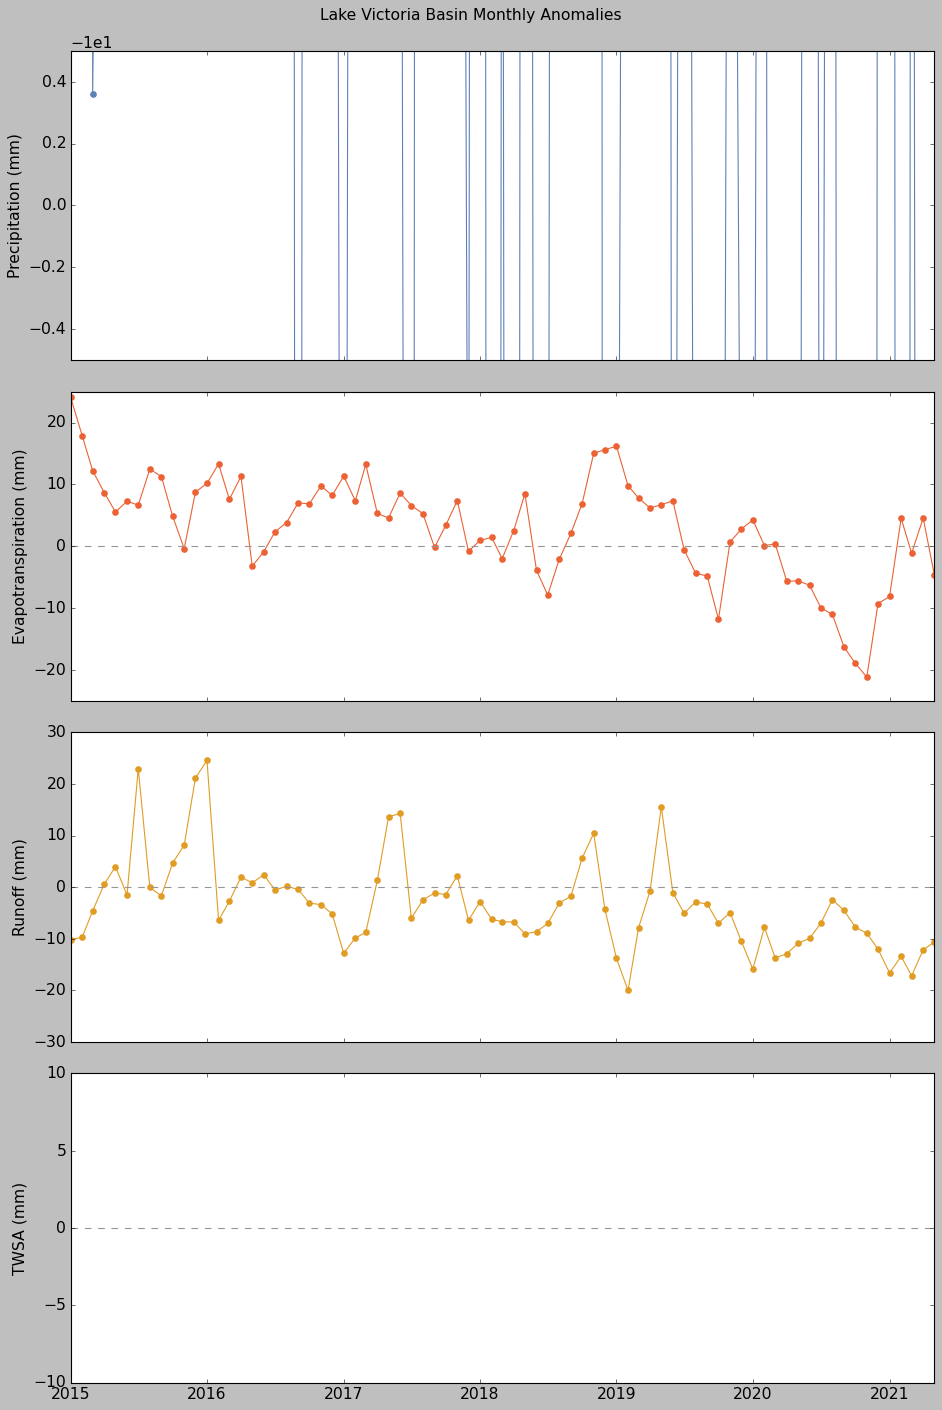

In [19]:
def plot_yearly_anomaly(basin):
    p = pd.read_csv('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/data_for_anomalies/p_anomaly.csv')
    et = pd.read_csv('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/data_for_anomalies/et_anomaly.csv')
    r = pd.read_csv('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/data_for_anomalies/r_anomaly.csv')
    #sm = pd.read_csv('D:/LakeVictoria_anomalies/sm_anomalies.csv')
    twsa = pd.read_csv('C:/Users/Jessica Besnier/Documents/Fall 2021/AGU data/data_for_anomalies/grace_anomaly.csv')
    #msl = pd.read_csv('D:/LakeVictoria_anomalies/anom_msl.csv')

    #msl_mm = msl*1000 # convert from m to mm 

    p_mean = p.groupby('time').agg({'P(mm)': ['mean']})
    et_mean = et.groupby('time').agg({'ET(mm)': ['mean']})
    r_mean = r.groupby('time').agg({'R(mm)': ['mean']})
    #sm_mean = sm.groupby('time').agg({'SM(kg/m2)' : ['mean']})
    twsa_mean = twsa.groupby('time').agg({'TWSA(mm)': ['mean']})

    p_mean.index = pd.to_datetime(p_mean.index,format='%Y-%m-%d')
    et_mean.index = pd.to_datetime(et_mean.index,format='%Y-%m-%d')
    r_mean.index = pd.to_datetime(r_mean.index,format='%Y-%m-%d')
    #sm_mean.index = pd.to_datetime(sm_mean.index, format='%Y-%m-%d')
    twsa_mean.index = pd.to_datetime(twsa_mean.index,format='%Y-%m-%d')

    d = pd.date_range(start = '01/01/2015', end = '11/1/2021', freq = 'MS')
    #msl_mm.index = pd.to_datetime(d, format = '%Y-%m-%d')


    plt.style.use('tableau-colorblind10')
    plt.rcParams.update({'font.size': 14})

    fig1, axes = plt.subplots(4,1,figsize=(12,18),sharex=True)
    axes[0].plot(p_mean['01/01/2015':]/865, marker = 'o', color='#5e81b5', linewidth=1, markeredgewidth = 0.0)
    axes[1].plot(et_mean['01/01/2015':], marker = 'o', color = '#ec6235',linewidth=1, markeredgewidth = 0.0)
    axes[2].plot(r_mean['01/01/2015':],marker = 'o',color = '#e19c24',linewidth=1, markeredgewidth = 0.0)
    #axes[3].plot(sm_mean, marker = 'o', color = '#8fb131', linewidth=1, markeredgewidth = 0.0) ##d09e41
    #axes[3].plot(twsa_mean['01/01/2015':], marker = 'o', color='#8778b3',linewidth=1, markeredgewidth = 0.0)
    #axes[5].plot(msl_mm, marker = 'o', color = '#a9627f', linewidth=1, markeredgewidth = 0.0)


    # axes[0].plot(p_mean, marker = '.', color='#759dc4', linewidth=1)
    # axes[1].plot(et_mean, marker = '.', color = '#d09e41',linewidth=1)
    # axes[2].plot(r_mean,marker = '.',color = '#a9627f',linewidth=1)
    # axes[3].plot(sm_mean, marker = '.', color = '#929600', linewidth=1) ##d09e41
    # axes[4].plot(twsa_mean, marker = '.', color='#8778b3',linewidth=1)

    #axes[4].tick_params(axis='x', which='both', bottom='False')
    #axes[5].tick_params(axis='x')
    axes[2].tick_params(axis='x')



    axes[0].set_ylabel('Precipitation (mm)')
    axes[1].set_ylabel('Evapotranspiration (mm)')
    axes[2].set_ylabel('Runoff (mm)')
   # axes[3].set_ylabel('Soil Moisture (kg/m$^2$)')
    axes[3].set_ylabel('TWSA (mm)')
    #axes[5].set_ylabel('Lake Level Height (mm)')


    axes[0].set_ylim([-10,-10])
    axes[1].set_ylim([-25,25])
    axes[2].set_ylim([-30,30])
    #axes[3].set_ylim([-160,160])
    axes[3].set_ylim([-10,10])
    #axes[5].set_ylim([-1600,1600])


    #axes[0].grid(which='major',axis='both')
    #axes[1].grid(which='major',axis='both')
    #axes[2].grid(which='major',axis='both')
    #axes[3].grid(which='major',axis='both')

    # add horizontal zero line for all plots 
    axes[0].axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
    axes[1].axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
    axes[2].axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
    #axes[3].axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
    axes[3].axhline(y=0, color = '#969696', linestyle='--', linewidth=1)
    #axes[5].axhline(y=0, color = '#969696', linestyle='--', linewidth=1)

    #plt.xlim([d[0], d[352]])
    fig1.suptitle('Lake Victoria Basin Monthly Anomalies')
    fig1.tight_layout()
    fig1.subplots_adjust(top=0.95)


plot_yearly_anomaly ('')

#plt.savefig('D:/LakeVictoria_anomalies/LVB_figs_draft/test_anomalies_ts.png')